In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 25

In [2]:
df = pd.read_csv('TMDB_movie_dataset_cleaned.csv')

In [3]:
# Drop rows with zero revenue
df = df[df['revenue'] != 0]
df = df[df['budget'] != 0]

# Drop movies not released between 2014 - 2024
df = df[(df['release_date'] >= '2014-01-01')|(df['release_date'] <= '2024-12-31')]

# Drop movies with revenue <= $100,000
df = df[df['revenue'] >= 100000]

In [4]:
# Use IQR method to filter out outliers for revenue and budget
Q1_revenue = df['revenue'].quantile(0.25)
Q3_revenue = df['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
print(IQR_revenue)

Q1_budget = df['budget'].quantile(0.25)
Q3_budget = df['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget
print(IQR_budget)

# Filter out outliers
df_cleaned = df[
    (df['revenue'] >= Q1_revenue - 1.5 * IQR_revenue) & (df['revenue'] <= Q3_revenue + 1.5 * IQR_revenue)
    #& (df['budget'] >= Q1_budget - 1.5 * IQR_budget) & (df['budget'] <= Q3_budget + 1.5 * IQR_budget)
]

26843616.0
18000000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 3536
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1782 non-null   int64  
 1   title                 1782 non-null   object 
 2   vote_average          1782 non-null   float64
 3   vote_count            1782 non-null   int64  
 4   status                1782 non-null   object 
 5   release_date          1782 non-null   object 
 6   revenue               1782 non-null   int64  
 7   runtime               1782 non-null   int64  
 8   adult                 1782 non-null   bool   
 9   backdrop_path         1665 non-null   object 
 10  budget                1782 non-null   int64  
 11  homepage              854 non-null    object 
 12  imdb_id               1705 non-null   object 
 13  original_language     1782 non-null   object 
 14  original_title        1782 non-null   object 
 15  overview              1752

In [ ]:
# Engineering new profit feature
df['profit'] = df['revenue'] - df['budget']

# Engineering new profit margin feature
df['profit_margin'] = ((df['revenue'] - df['budget'])/df['revenue']) * 100
df_positive = df[df['profit_margin'] >= 0]
df_negative = df[df['profit_margin'] < 0]

**Questions**
1. Which production companies consistently produce the most profitable movies?
    - This question aims to identify the top production companies based on average profit, helping to understand what makes them successful.

In [ ]:
# Split and explode the production_companies column, because there are multiple companies in a single cell
df['production_companies'] = df['production_companies'].str.split(', ')
df_exploded_companies = df.explode('production_companies')

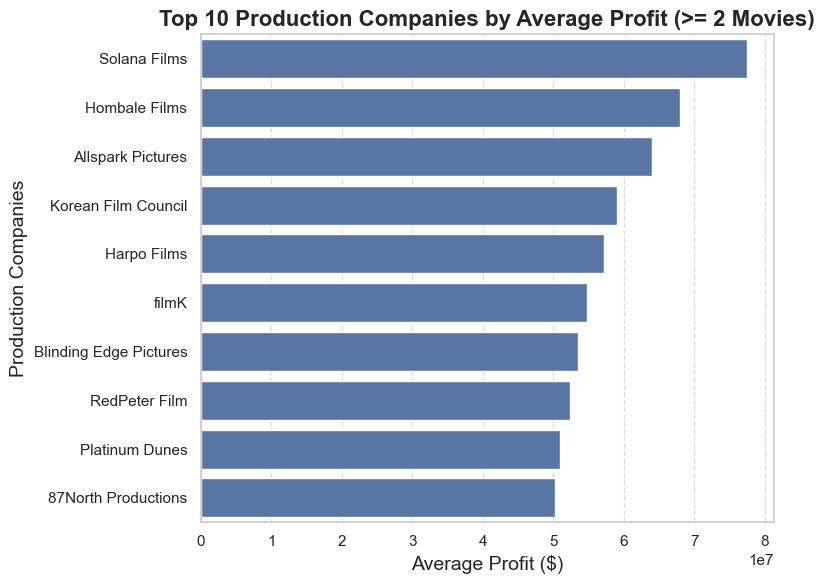

In [86]:
# Group by production companies and calculate the average profit and count of movies made
avg_profit = df_exploded_companies.groupby('production_companies').agg({'profit': 'mean', 'title': 'count'}).reset_index()

# Filter to top 20 companies by average profit per movie
avg_profit = avg_profit[avg_profit['title'] >= 2]

# Filter to top 20 companies by average profit per movie
avg_profit = avg_profit.sort_values(by='profit', ascending=False).head(10)

# Remove any non-ASCII characters
avg_profit['production_companies'] = avg_profit['production_companies'].str.encode('ascii', 'ignore').str.decode('ascii')

avg_profit.head()

# Create a bar plot with improved aesthetics
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=avg_profit, x='profit', y='production_companies')

# Add titles and labels
plt.title('Top 10 Production Companies by Average Profit (>= 2 Movies)', fontsize=16, weight='bold')
plt.xlabel('Average Profit ($)', fontsize=14)
plt.ylabel('Production Companies', fontsize=14)

# Enhance the layout with gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

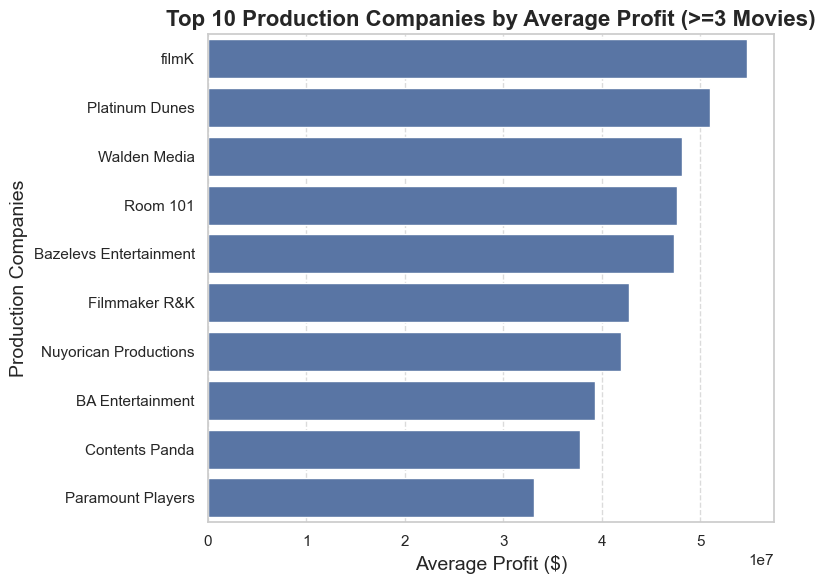

In [85]:
# Group by production companies and calculate the average profit and count of movies made
avg_profit = df_exploded_companies.groupby('production_companies').agg({'profit': 'mean', 'title': 'count'}).reset_index()

# Filter to top 20 companies by average profit per movie
avg_profit = avg_profit[avg_profit['title'] >= 3]

# Filter to top 20 companies by average profit per movie
avg_profit = avg_profit.sort_values(by='profit', ascending=False).head(10)

# Remove any non-ASCII characters
avg_profit['production_companies'] = avg_profit['production_companies'].str.encode('ascii', 'ignore').str.decode('ascii')

avg_profit.head()

# Create a bar plot with improved aesthetics
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=avg_profit, x='profit', y='production_companies')

# Add titles and labels
plt.title('Top 10 Production Companies by Average Profit (>=3 Movies)', fontsize=16, weight='bold')
plt.xlabel('Average Profit ($)', fontsize=14)
plt.ylabel('Production Companies', fontsize=14)

# Enhance the layout with gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

2. What is the relationship between movie budgets and profit margins?
- Understanding how different budget levels impact profitability can guide future investments and production decisions. Are high-budget films
more successful, or do low-budget films offer better returns?

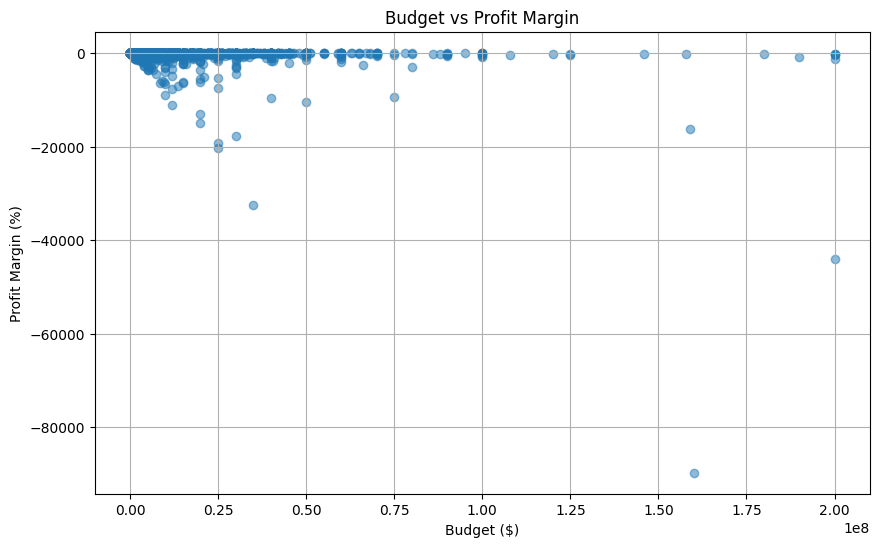

In [ ]:
# Create a scatter plot to visualize the relationship between budget and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit_margin'], alpha=0.5)
plt.title('Budget vs Profit Margin')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
#plt.xscale('log')  # Optional: Use log scale for better visibility
#plt.yscale('log')
plt.grid()
plt.show()

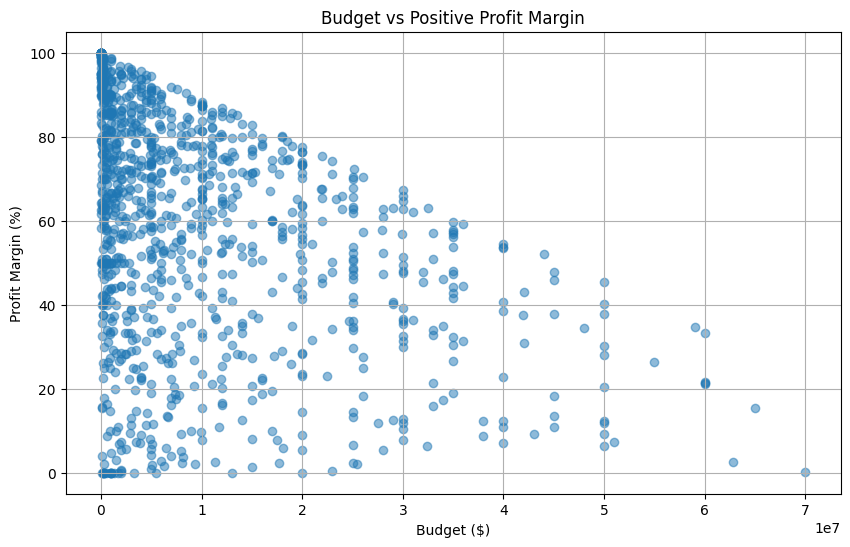

In [ ]:
# Create a scatter plot to visualize the relationship between budget and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df_positive['budget'], df_positive['profit_margin'], alpha=0.5)
plt.title('Budget vs Positive Profit Margin')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
#plt.xscale('log')  # Optional: Use log scale for better visibility
#plt.yscale('log')
plt.grid()
plt.show()

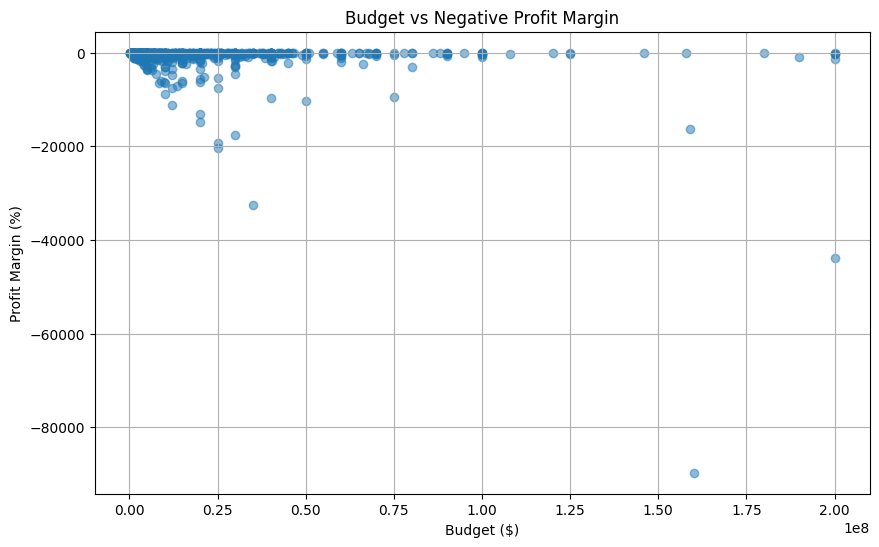

In [ ]:
# Create a scatter plot to visualize the relationship between budget and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df_negative['budget'], df_negative['profit_margin'], alpha=0.5)
plt.title('Budget vs Negative Profit Margin')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
#plt.xscale('log')  # Optional: Use log scale for better visibility
#plt.yscale('log')
plt.grid()
plt.show()

3. How do factors like genre and average viewer ratings (vote_average) influence a movie's financial success?
- Analyzing the impact of genre and viewer ratings on revenue and profit margins can provide insights into audience preferences and what types of movies are likely to succeed.

In [ ]:
df['genres'] = df['genres'].str.split(', ')
df_genre_exploded = df.explode('genres')

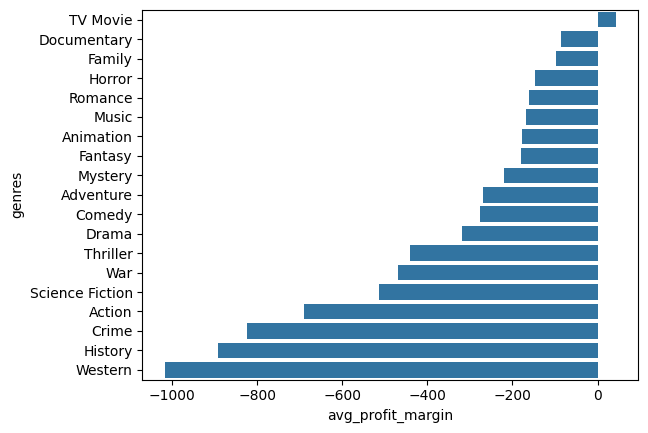

In [ ]:
genre_analysis = df_genre_exploded.groupby('genres').agg(
    avg_profit_margin=('profit_margin', 'mean'),
    avg_vote_average=('vote_average', 'mean')
).reset_index()

genre_analysis_sorted = genre_analysis.sort_values(by='avg_profit_margin', ascending=False)
sns.barplot(data=genre_analysis_sorted, x='avg_profit_margin', y='genres')
plt.show()

4. How does average profit change over time?

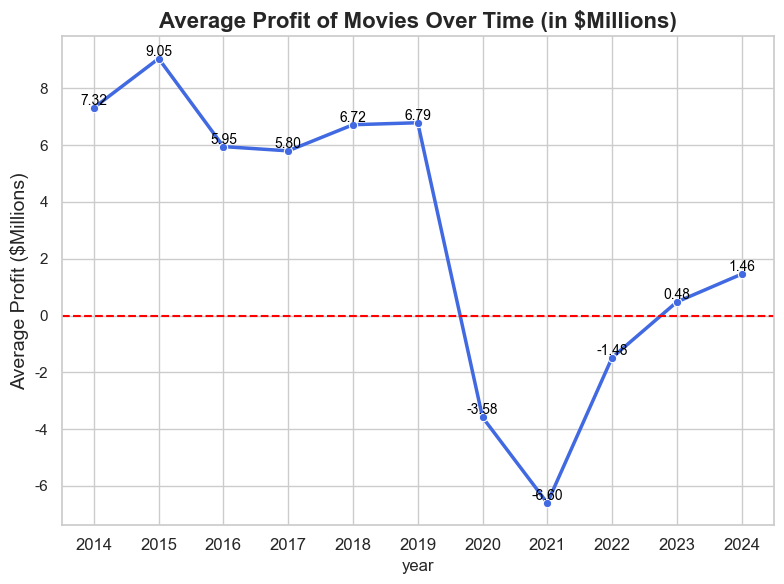

In [84]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year and calculate average profit
df['year'] = df['release_date'].dt.year
average_profit = df.groupby('year')['profit'].mean().reset_index()
movie_count = df.groupby('year')['title'].count().reset_index(name='movie_count').astype(int)

# Merge the two DataFrames
combined_data = pd.merge(average_profit, movie_count, on='year')

combined_data['profit'] = (combined_data['profit'] / 1000000).round(2)

# Generate the seaborn plot
plt.figure(figsize=(8, 6))

# Plot average profit
sns.lineplot(data=combined_data, x='year', y='profit', marker='o', color='royalblue', linewidth=2.5)

# Add a horizontal line at y=0 to make it apparent
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)

# Set labels and title
plt.ylabel('Average Profit ($Millions)', fontsize=14)
plt.title('Average Profit of Movies Over Time (in $Millions)', fontsize=16, fontweight='bold')

for i, row in combined_data.iterrows():
    plt.text(row['year'], row['profit'] + 0.1, f"{row['profit']:.2f}", 
             horizontalalignment='center', fontsize=10, color='black')

# Show the plot
plt.xticks(combined_data['year'], fontsize=12)
plt.tight_layout()
plt.show()

5. How does the popularity score change over time?
- Investigating the relationship between a movie's popularity and its profitability can help assess whether a higher popularity score translates into better financial outcomes, guiding marketing and distribution strategies.

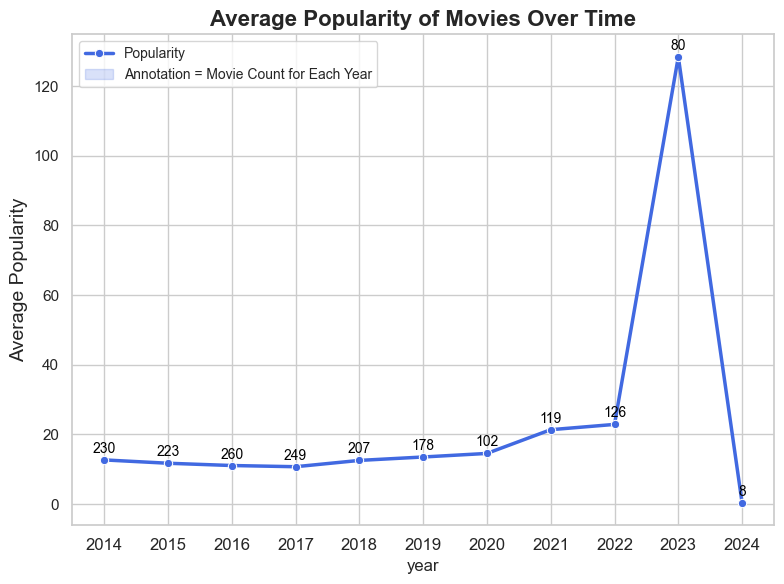

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year and calculate average popularity
df['year'] = df['release_date'].dt.year
average_popularity = df.groupby('year')['popularity'].mean().reset_index()
movie_count = df.groupby('year')['title'].count().reset_index(name='movie_count').astype(int)

# Merge the two DataFrames
combined_data = pd.merge(average_popularity, movie_count, on='year')

# Generate the seaborn plot
plt.figure(figsize=(8, 6))

# Plot average popularity
sns.lineplot(data=combined_data, x='year', y='popularity', marker='o', color='royalblue', linewidth=2.5)

# Annotate the count of movies for each year
for i, row in combined_data.iterrows():
    plt.text(row['year'], row['popularity'] + 2, f"{int(row['movie_count'])}", 
             horizontalalignment='center', fontsize=10, color='black')

# Set labels and title
plt.ylabel('Average Popularity', fontsize=14)
plt.title('Average Popularity of Movies Over Time', fontsize=16, fontweight='bold')


plt.legend(['Popularity', 'Annotation = Movie Count for Each Year'], loc='upper left', fontsize=10)

# Show the plot
plt.xticks(combined_data['year'], fontsize=12)
plt.tight_layout()
plt.show()